<a href="https://colab.research.google.com/github/leorr/AI/blob/main/Projeto_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINKS REFERÊNCIAS:

Classify Images Using Python & Machine Learning - https://www.youtube.com/watch?v=iGWbqhdjf2s

 CNN Com cachorros e gatos - https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

 what-are-max-pooling-average-pooling-global-max-pooling https://github.com/christianversloot/machine-learning-articles/blob/main/what-are-max-pooling-average-pooling-global-max-pooling-and-global-average-pooling.md

 Global Max Pool https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool2D

Multiprocessing https://stackoverflow.com/questions/55531427/how-to-define-max-queue-size-workers-and-use-multiprocessing-in-keras-fit-gener

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers
import os
import pandas as pd
import seaborn as sn


In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    'Downloads/DATA',
    validation_split=0.2,
    subset="training",
    label_mode='categorical',
    seed=123,
    image_size=(100,100),
    batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  'Downloads/DATA',
  validation_split=0.2,
  subset="validation",
  label_mode='categorical',
  seed=123,
  image_size=(100, 100),
  batch_size=32)

Found 6000 files belonging to 3 classes.
Using 4800 files for training.
Found 6000 files belonging to 3 classes.
Using 1200 files for validation.


In [21]:
class_names = train_ds.class_names
print(class_names)

['cat', 'dog', 'wild']


In [4]:
base_model = tf.keras.applications.MobileNet(weights='imagenet',
                                             include_top=False,
                                             input_shape=(100,100,3),
                                             pooling="max")
x=base_model.output
x=tf.keras.layers.Dropout(0.5)(x)
preds=tf.keras.layers.Dense(3, activation='softmax')(x)  
model = tf.keras.models.Model(
    inputs=base_model.input,
    outputs=preds
)

for l in model.layers:
  if l.name.split('_')[0] != 'dense':
    l.trainable=False
  else:
    l.trainable=True

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 50, 50, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 50, 50, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 50, 50, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 50, 50, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 50, 50, 32)       128       
 ation)                                                      

In [6]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

step_size_train=4800//32
step_size_val = 1200//32

history = model.fit(
    x=train_ds,
    steps_per_epoch=step_size_train,
    epochs=500,
    validation_data=val_ds,
    validation_steps=step_size_val
)

Epoch 1/500
150/150 [==============================] - 19s 120ms/step - loss: 2.1730 - accuracy: 0.4885 - val_loss: 0.8533 - val_accuracy: 0.6774
Epoch 2/500
150/150 [==============================] - 17s 116ms/step - loss: 1.3523 - accuracy: 0.5979 - val_loss: 0.8502 - val_accuracy: 0.6850
Epoch 3/500
150/150 [==============================] - 18s 120ms/step - loss: 1.0092 - accuracy: 0.6379 - val_loss: 0.6966 - val_accuracy: 0.7255
Epoch 4/500
150/150 [==============================] - 18s 118ms/step - loss: 0.8516 - accuracy: 0.6650 - val_loss: 0.6715 - val_accuracy: 0.7221
Epoch 5/500
150/150 [==============================] - 18s 117ms/step - loss: 0.7785 - accuracy: 0.6785 - val_loss: 0.6256 - val_accuracy: 0.7441
Epoch 6/500
150/150 [==============================] - 18s 118ms/step - loss: 0.7342 - accuracy: 0.6965 - val_loss: 0.6433 - val_accuracy: 0.7373
Epoch 7/500
150/150 [==============================] - 18s 117ms/step - loss: 0.7491 - accuracy: 0.6869 - val_loss: 0.6548 -

In [7]:
results = model.evaluate_generator(val_ds, 15)
print('Acc: %.3f, Loss: %.3f' % (results[1], results[0]))
print(history.history.keys())

C:\Users\leona\AppData\Local\Temp\ipykernel_13772\3470705721.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results = model.evaluate_generator(val_ds, 15)


Acc: 0.727, Loss: 0.657
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


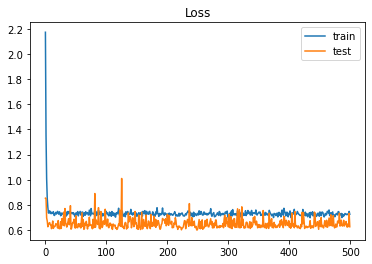

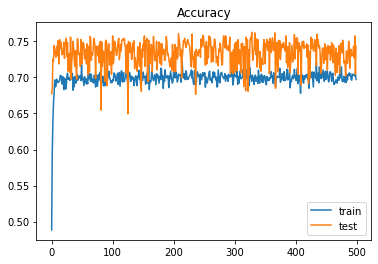

In [16]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
print()
print()
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [17]:
predictions = model.predict(val_ds, steps = 2)
y_pred = np.argmax(predictions, axis=-1)
val_labels=val_ds.class_names
classification = classification_report(val_labels, y_pred)
print(classification)
matrix = confusion_matrix(val_labels, y_pred)
df_cm = pd.DataFrame(matrix, index = [i for i in range(3)],
                  columns = [i for i in range(3)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, linewidths=2.5)

2/2 [==============================] - 0s 91ms/step


ValueError: ignored

In [19]:
import cv2
import tensorflow as tf

def prepare(filepath):
    IMG_SIZE = 100  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

predicition = model.predict([prepare('Downloads/haha/doggo.png.png')])

def get_class(prediction):
    i = 0
    for each in predicition[0]:
        if (each>0.5):
            if(i == 0):
                return 'cat'
            if(i == 1):
                return 'dog'
            if(i == 2):
                return 'wild'
        i+=1
    return 'unknown'

print(get_class(predicition))

ValueError: ignored